<h1> SEGUNDA PARTE DE LA TAREA DE DATOS SECUENCIALES </h1>

Presentado por

<li> Juan Sebastian Cortez
<li> Esteban Ramos Gomez
<li> Roberto Carlos Mosquera

<h1> 1. OBJETIVOS DE APLICACIÒN </H1>

En este proyecto, fue necesario realizar una intensa lluvia de ideas con nuestro grupo de trabajo, compuesto por tres personas. Surgieron diversas propuestas, como crear una aplicación para clasificar los diferentes tipos de deportes o una aplicación para clasificar los distintos géneros musicales. Sin embargo, con la ayuda de nuestro compañero Juan Sebastián, surgió una idea genial: clasificar los diferentes tipos de voces presentes en nuestro grupo de trabajo. Para completar esta tarea, fue necesario añadir dos voces adicionales. Además, se propuso incluir una quinta clase, que sería el silencio, para que el algoritmo detecte cuando nadie esté hablando.

Para ello, los objetivos de esta aplicaciòn son los siguientes.

<br>
<br>

<li> <b> OBJETIVO GENERAL </li></b>
- Desarrollar un sistema de clasificación de audio capaz de identificar y categorizar diferentes tipos de voces y el silencio en un entorno de trabajo, utilizando Edge Impulse y algoritmos de redes neuronales.
<br>
<br>
<br>


<li> <b> OBJETIVOS ESPECIFICOS </li></b>

- <b>Recolectar y Preprocesar Datos de Audio:</b> Capturar y preprocesar muestras de audio de diferentes voces y silencio, asegurando una calidad adecuada para el entrenamiento del modelo.

- <b> Diseñar y Entrenar Modelos de Redes Neuronales:</b>Implementar y entrenar modelos de redes neuronales utilizando Edge Impulse para clasificar las diferentes categorías de audio con alta precisión.

- <b> Validar y Evaluar el Modelo:</b> Realizar pruebas para validar la precisión y robustez del modelo, asegurando que las predicciones sean correctas y equilibradas.

- <b>Implementar el Modelo en Dispositivos Edge</b>: Desplegar el modelo entrenado en dispositivos edge, como smartphones, para su uso en tiempo real y evaluar su rendimiento en condiciones reales.

<br>
<br>

<h1> 2. DESCRIPCIÒN DEL PROYECTO </h1>

-  Este proyecto tiene como objetivo desarrollar un sistema de clasificación de audio que pueda identificar y categorizar diferentes tipos de voces y el silencio en un entorno de trabajo, utilizando Edge Impulse y algoritmos de redes neuronales. Este sistema podría ser útil para mejorar la eficiencia en reuniones virtuales, permitiendo la identificación automática de los participantes que están hablando y detectando momentos de silencio. Además, podría aplicarse en la creación de asistentes virtuales más inteligentes y en la mejora de sistemas de reconocimiento de voz en diversas aplicaciones tecnológicas.

In [ ]:
# Realizamos la importacion de librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import soundfile as sf
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, SimpleRNN, GRU, BatchNormalization, Input
from keras import callbacks as call
from keras import models as mod
import random


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
carpeta_raiz = '/content/drive/MyDrive/AUDIOS'

<h1>  Visualizamos espectro de carlos <h1/>

<h3> Dentro de la función se configuro el tamaño de la figura para que sea lo suficientemente amplia con plt.figure(figsize=(10, 4)). Luego usamos plt.plot() para graficar el eje del tiempo (np.linspace) contra la amplitud de la señal (el arreglo audio).<h3/>

<h3>Después, agregamos un título, etiquetas para los ejes ("Tiempo" y "Amplitud") y finalmente utilizo plt.show() para mostrar el gráfico.<h3/>

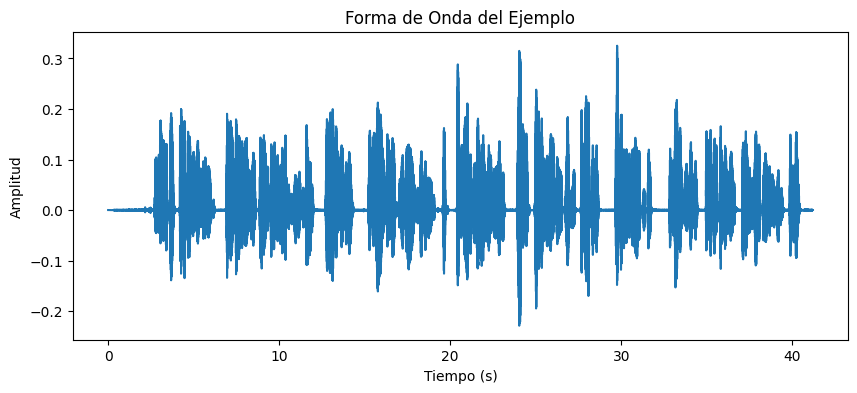

In [ ]:
import matplotlib.pyplot as plt

def graficar_forma_onda(audio, sr, titulo="Forma de Onda"):
    plt.figure(figsize=(10, 4))
    plt.plot(np.linspace(0, len(audio) / sr, len(audio)), audio)
    plt.title(titulo)
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.show()

# Ejemplo: cargar un audio y graficarlo
audio_ejemplo, sr = librosa.load('/content/drive/MyDrive/AUDIOS/CARLOS/carlos1.wav', sr=16000)
graficar_forma_onda(audio_ejemplo, sr, titulo="Forma de Onda del Ejemplo")

<h3>En esta parte podemos ver que la función graficar_espectrograma genera el espectrograma Mel de un audio usando librosa.feature.melspectrogram y lo convierte a decibeles con librosa.power_to_db. Utiliza librosa.display.specshow para graficar el espectrograma en función del tiempo y la escala Mel, añadiendo una barra de colores para mostrar la intensidad en dB. Configura el diseño del gráfico con un formato claro y muestra el resultado con plt.show. Y podemos ver que se graficó el espectrograma del archivo de audio cargado.<h3/>

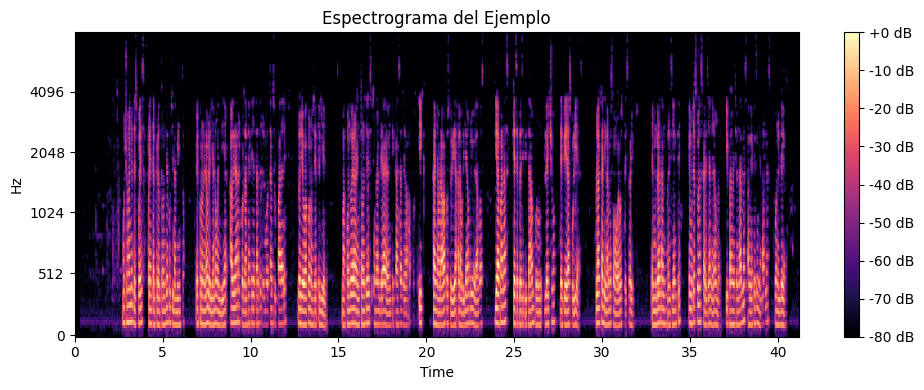

In [ ]:
def graficar_espectrograma(audio, sr, titulo="Espectrograma"):
    S = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128, fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
    plt.colorbar(format='%+2.0f dB')
    plt.title(titulo)
    plt.tight_layout()
    plt.show()

graficar_espectrograma(audio_ejemplo, sr, titulo="Espectrograma del Ejemplo")

<h3>En esta parte del codigo podemos observar que la función graficar_mfccs calcula los coeficientes MFCC de un audio usando librosa.feature.mfcc, y los visualiza en un gráfico. Utiliza librosa.display.specshow para graficar los MFCC en función del tiempo, añadiendo una barra de color para interpretar la escala. Configura el diseño del gráfico para mayor claridad con etiquetas y un título, mostrándolo con plt.show. Podemos ver que se graficaron los MFCCs del archivo cargado, en este caso "MFCCs del Ejemplo".<h3/>

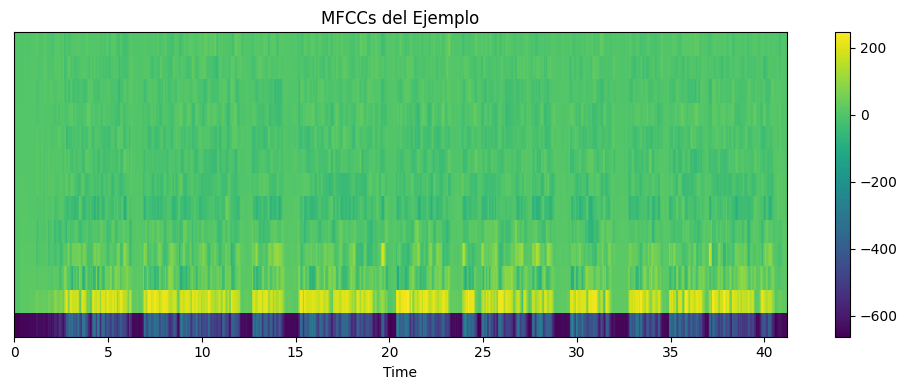

In [ ]:
def graficar_mfccs(audio, sr, titulo="MFCCs"):
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time', sr=sr, cmap='viridis')
    plt.colorbar()
    plt.title(titulo)
    plt.tight_layout()
    plt.show()

graficar_mfccs(audio_ejemplo, sr, titulo="MFCCs del Ejemplo")

In [ ]:
#importamos os
import os

def contar_audios_por_clase(directory):
    clases = os.listdir(directory)
    conteo_por_clase = {}

    for clase in clases:
        carpeta_clase = os.path.join(directory, clase)
        if os.path.isdir(carpeta_clase):
            conteo_por_clase[clase] = len([archivo for archivo in os.listdir(carpeta_clase) if archivo.endswith('.wav')])

    return conteo_por_clase

# Ruta al directorio de datos
directorio_datos = '/content/drive/MyDrive/AUDIOS'

# Conteo de audios por clase
conteo = contar_audios_por_clase(directorio_datos)

# Mostramos el conteo
for clase, cantidad in conteo.items():
    print(f'Clase: {clase}, Cantidad de audios: {cantidad}')


Clase: ESTEBAN, Cantidad de audios: 4
Clase: SEBAS, Cantidad de audios: 4
Clase: CARLOS, Cantidad de audios: 4
Clase: ANDREA, Cantidad de audios: 4
Clase: SILENCIO, Cantidad de audios: 1


In [ ]:
def quitar_silencios(señal, top_db=30):

    # Se Detectan regiones no silenciosas
    intervalos = librosa.effects.split(señal, top_db=top_db)

    # Se combinan las regiones no silenciosas
    señal_sin_silencio = np.concatenate([señal[inicio:fin] for inicio, fin in intervalos])

    return señal_sin_silencio

def combinar_audios(carpeta_hablante, sr_global=16000, con_silencios = True):

    señal_combinada = []
    for archivo in sorted(os.listdir(carpeta_hablante)):
        ruta_audio = os.path.join(carpeta_hablante, archivo)
        try:
            # Cargamos el audio con la frecuencia de muestreo especificada
            audio, sr = librosa.load(ruta_audio, sr=sr_global)
            # Cortamos el inicio y el final del audio
            if con_silencios:
              señal_combinada.append(audio)
            else:
              audio_cortado = quitar_silencios(audio)
              señal_combinada.append(audio_cortado)
        except Exception as e:
            print(f"Error procesando {ruta_audio}: {e}")

    # Concatenamos todas las señales
    señal_combinada = np.concatenate(señal_combinada)
    return señal_combinada, sr_global


In [ ]:
def procesar_dataset(ruta_base):
    # Inicializamos listas para almacenar los datos de audio y sus etiquetas
    datos = []
    etiquetas = []

    # Listamos las carpetas en la ruta base y las ordena, asumiendo que cada carpeta es una clase
    clases = sorted(os.listdir(ruta_base))


    for etiqueta, clase in enumerate(clases):

        carpeta_hablante = os.path.join(ruta_base, clase)

        # Procesamos las señales de audio dependiendo de la clase
        if etiqueta != 4:
            señal, sr = combinar_audios(carpeta_hablante, con_silencios=False)
        else:
            señal, sr = combinar_audios(carpeta_hablante, con_silencios=True)

        # Agregamos la señal procesada y la etiqueta a las listas correspondientes
        datos.append(señal)
        etiquetas.append(etiqueta)


    return datos, etiquetas, sr

# Definenimos la ruta base que contiene las carpetas de las clases
ruta_base = '/content/drive/MyDrive/AUDIOS'


datos, etiquetas, sr = procesar_dataset(ruta_base)


In [ ]:
def ajustar_longitud(datos, max_len):
    # Inicializamos una lista para almacenar las señales ajustadas
    datos_ajustados = []

    # Se recorre cada señal en los datos
    for señal in datos:

        if len(señal) > max_len:
            datos_ajustados.append(señal[:max_len])
        else:
            # Si la señal es más corta, se rellena con ceros (padding)
            padding = np.zeros(max_len - len(señal))
            datos_ajustados.append(np.concatenate([señal, padding]))

    # Se retorna los datos ajustados como un arreglo de numpy
    return np.array(datos_ajustados)


max_len = 100 * sr
# Se ajusta las señales a la longitud máxima
X = ajustar_longitud(datos, max_len)
# Se convierte las etiquetas a un arreglo de numpy
y = np.array(etiquetas)


In [ ]:
X.shape

(5, 1600000)

In [ ]:
X[X>0.4]=0.1
X[X<-0.3]=-0.1

<h3>Audio de Andrea<h3/>

 <h3> Aca se grafica la forma de onda del primer ejemplo en el conjunto X, mostrando la amplitud de la señal en función del tiempo (muestras). Esto permite visualizar cómo luce la señal tras ajustar su longitud. <h3/>

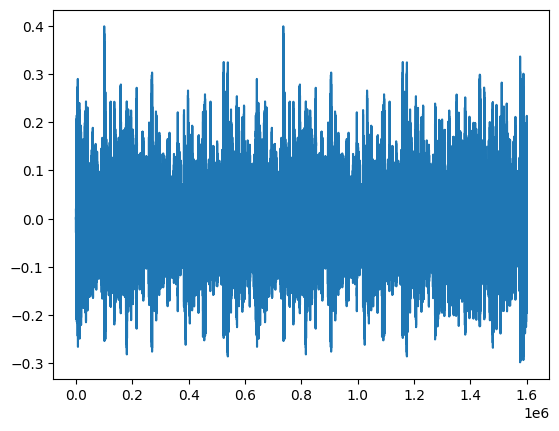

In [ ]:
plt.plot(X[0,:])

Audio de Carlos

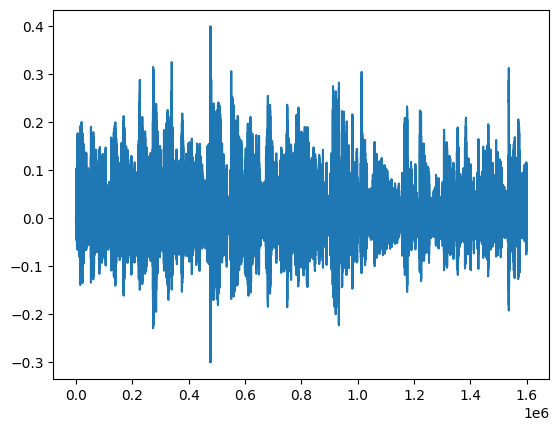

In [ ]:
plt.plot(X[1,:])

Audio de Esteban

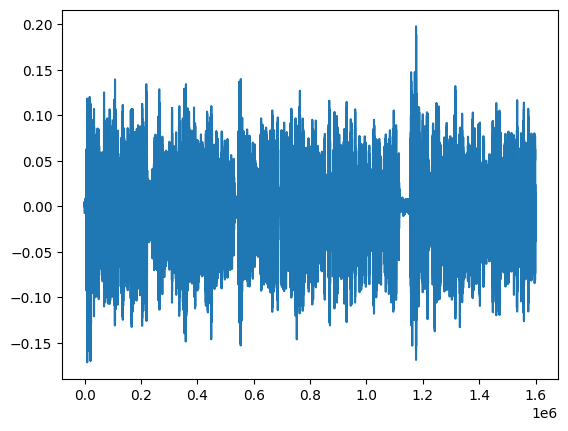

In [ ]:
plt.plot(X[2,:])

Audio de Sebastian

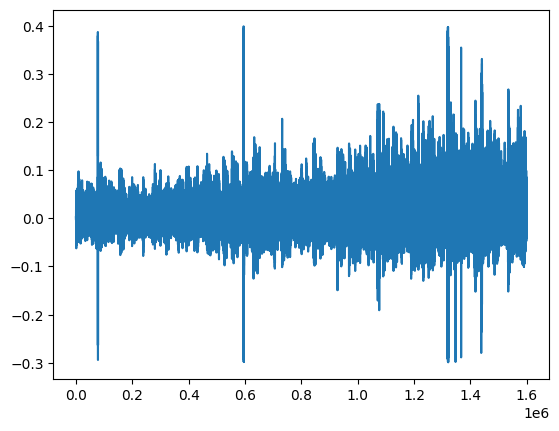

In [ ]:
plt.plot(X[3,:])

Audio de Silencio

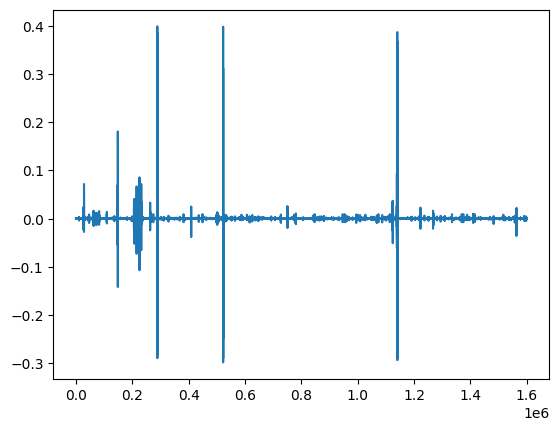

In [ ]:
plt.plot(X[4,:])

<h3>Basado en el contenido del audio:<h3/>

<h3>Breves características vocales: Si el objetivo es capturar características rápidas como fonemas o entonación, ventanas de 0.5 a 1 segundo pueden ser suficientes.<h3/>

<h3>Patrones más complejos: Si necesitas capturar patrones más largos como palabras o frases cortas, ventanas de 2 a 5 segundos son ideales.<h3/>

<h3>Características de contexto: Si deseas capturar la fluidez del habla o patrones de prosodia, ventanas de 5 a 10 segundos pueden ser útiles.<h3/>

In [ ]:
def dividir_en_fragmentos(señal, sr, duracion_fragmento=1):

    fragmentos = []
    # Calculamos el número de muestras por fragmento
    muestras_por_fragmento = sr * duracion_fragmento

    # Dividimos la señal en fragmentos de longitud fija
    for i in range(0, len(señal), muestras_por_fragmento):
        fragmento = señal[i:i + muestras_por_fragmento]

        # Si el fragmento es más corto que el tamaño deseado, rellenarlo con ceros
        if len(fragmento) < muestras_por_fragmento:
            fragmento = np.pad(fragmento, (0, muestras_por_fragmento - len(fragmento)), 'constant')

        fragmentos.append(fragmento)

    return np.array(fragmentos)

In [ ]:
def procesar_señales(señales, sr, n_hablantes):

    fragmentos = []
    etiquetas = []

    for i in range(n_hablantes):
        señal = señales[i, :]  # Obtenemos la columna i de la matriz de señales
        fragmentos_hablante = dividir_en_fragmentos(señal, sr)

        # Agregamos los fragmentos y etiquetas
        fragmentos.extend(fragmentos_hablante)
        etiquetas.extend([i] * len(fragmentos_hablante))

    # Convertimos fragmentos a numpy array
    X = np.array(fragmentos)
    y = np.array(etiquetas)

    return X, y


X_frag, y = procesar_señales(X, sr=16000, n_hablantes=5)

# Verificamos la forma final de X (los fragmentos) y y (las etiquetas)
print(f"Shape de X: {X_frag.shape}")
print(f"Shape de y: {y.shape}")

Shape de X: (500, 16000)
Shape de y: (500,)


<h3> Este código define una función para exportar archivos de audio organizados por etiquetas. Primero, se asegura de que el directorio de salida exista. Luego, itera sobre las señales de audio y sus etiquetas, creando subdirectorios para cada etiqueta si no existen. Cada archivo de audio se guarda en formato WAV en el subdirectorio correspondiente, con un nombre que incluye su índice en la lista. Finalmente, imprime un mensaje indicando que los audios han sido exportados y organizados por etiquetas. </h3>

In [ ]:
import os
import soundfile as sf

def exportar_audios_por_etiqueta(X, y, sr, output_dir):

    # No aseguramos de que la carpeta de salida existe
    os.makedirs(output_dir, exist_ok=True)

    # Iteramos sobre las señales y sus etiquetas
    for idx, (audio, etiqueta) in enumerate(zip(X, y)):
        # Creamos la carpeta para la etiqueta si no existe
        etiqueta_dir = os.path.join(output_dir, str(etiqueta))
        os.makedirs(etiqueta_dir, exist_ok=True)

        # Nombre del archivo de audio
        audio_filename = os.path.join(etiqueta_dir, f"audio_{idx}.wav")

        # Guardamos el audio en formato WAV
        sf.write(audio_filename, audio, sr)

    print(f"Audios exportados en {output_dir} organizados por etiquetas.")

In [ ]:
import shutil

# Comprimimos la carpeta en un archivo ZIP
carpeta = "audios_por_etiqueta"
archivo_zip = "audios_por_etiqueta.zip"

# Descargamos el archivo ZIP
from google.colab import files

###Metodo por redes profundas mediante extraccion de caracteristicas de audio MFCC compacto

Esta función, `extraer_mfccs`, toma como entrada un conjunto de datos de audio, la frecuencia de muestreo y el número de coeficientes MFCC a extraer. Para cada señal de audio en los datos, calcula los coeficientes MFCC utilizando la función `librosa.feature.mfcc`. Luego, reduce estos coeficientes a una representación compacta tomando la media a lo largo del tiempo. Finalmente, almacena los coeficientes MFCC compactados en una lista y devuelve un arreglo de numpy con todos los coeficientes MFCC extraídos.

In [ ]:
def extraer_mfccs(datos, sr, n_mfcc=13):

    mfccs = []
    for señal in datos:
        mfcc = librosa.feature.mfcc(y=señal, sr=sr, n_mfcc=n_mfcc)
        # Reduce a una representación compacta
        mfcc = np.mean(mfcc.T, axis=0)
        mfccs.append(mfcc)
    return np.array(mfccs)

In [ ]:
X_mfcc_frag = extraer_mfccs(X_frag, sr)

In [ ]:
X_mfcc_frag.shape

(500, 13)

Normalizar los datos

In [ ]:
# Normalizamos los fragmentos
scaler = MinMaxScaler()
X_normalizado = scaler.fit_transform(X_mfcc_frag)

print(X_normalizado.shape)

(500, 13)


In [ ]:
print(X_normalizado)

[[0.9574808  0.39158785 0.48151734 ... 0.48272234 0.20399007 0.73184526]
 [0.9387893  0.40130728 0.47109082 ... 0.35521823 0.21848765 0.60926664]
 [0.92002803 0.47685575 0.41784018 ... 0.4676242  0.1542345  0.687069  ]
 ...
 [0.16426194 0.260952   0.5020209  ... 0.5667298  0.70644337 0.72576034]
 [0.04008377 0.13450189 0.57975465 ... 0.5525987  0.703839   0.5185438 ]
 [0.13651824 0.22735219 0.48391408 ... 0.47400326 0.590173   0.5164763 ]]


Train Split de los datos

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.2, random_state=42, stratify = y)

Creación del modelo

In [ ]:
# Creamos el modelo MLP
modelo = Sequential()

# Capa de entrada
modelo.add(Input(shape=(13,)))
modelo.add(Dense(512, activation='relu'))
modelo.add(Dropout(0.5))

# Capa oculta
modelo.add(Dense(256, activation='relu'))
modelo.add(Dropout(0.5))

# Capa de salida
modelo.add(Dense(5, activation='softmax'))

# Compilación del modelo
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 139,781 (546.02 KB)

 Trainable params: 139,781 (546.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks = [call.ModelCheckpoint(filepath='model.best.keras', verbose = 1, save_best_only=True),\
             call.EarlyStopping(patience=5, restore_best_weights=True,min_delta=1e-3, monitor="val_loss"),\
             call.ReduceLROnPlateau(monitor='val_loss', patience = 3, verbose = 1, factor = 0.8, min_lr = 1e-5)]

modelo.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test),callbacks=callbacks,shuffle=True)

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.3124 - loss: 1.5634
Epoch 1: val_loss improved from inf to 1.33257, saving model to model.best.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 287ms/step - accuracy: 0.3181 - loss: 1.5600 - val_accuracy: 0.9100 - val_loss: 1.3326 - learning_rate: 0.0010
Epoch 2/30
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5938 - loss: 1.3897
Epoch 2: val_loss improved from 1.33257 to 0.94045, saving model to model.best.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6444 - loss: 1.2923 - val_accuracy: 0.9600 - val_loss: 0.9405 - learning_rate: 0.0010
Epoch 3/30
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8438 - loss: 1.0543
Epoch 3: val_loss improved from 0.94045 to 0.57901, saving model to model.best.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8407 - loss: 0.9224 - val_accuracy: 0.9800 - val_loss: 0.5790 - learning_rate: 0.0010
Epoch 4/30
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8438 - lo

In [ ]:
predicciones = modelo.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [ ]:
clases_predichas = np.argmax(predicciones, axis = 1)
print(clases_predichas)

[2 3 2 0 0 3 1 2 3 4 4 1 1 1 4 1 3 0 4 1 1 3 1 2 3 0 2 1 0 4 4 4 4 3 4 2 0
 2 1 3 0 3 2 4 2 0 4 0 1 1 0 3 0 2 0 2 4 4 0 0 3 2 3 3 0 2 2 3 1 0 3 2 4 2
 3 4 4 3 0 4 1 1 1 0 0 2 1 4 3 3 0 4 4 1 1 2 1 3 2 2]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy = accuracy_score(y_test, clases_predichas)
print(accuracy)

1.0


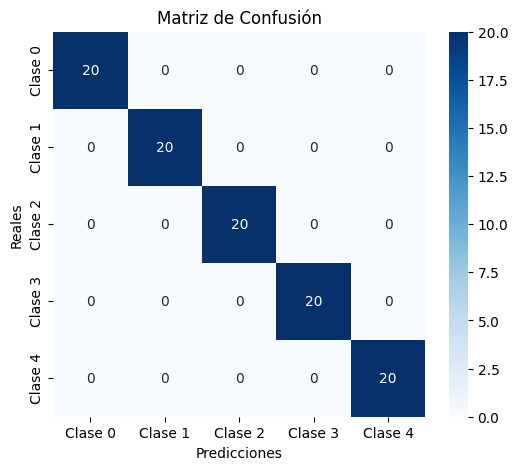

In [ ]:
# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, clases_predichas)

# Visualizamos la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3", "Clase 4"], yticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3", "Clase 4"])
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.title("Matriz de Confusión")
plt.show()

###Metodo por redes neuronales convolucionales 2D



In [ ]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

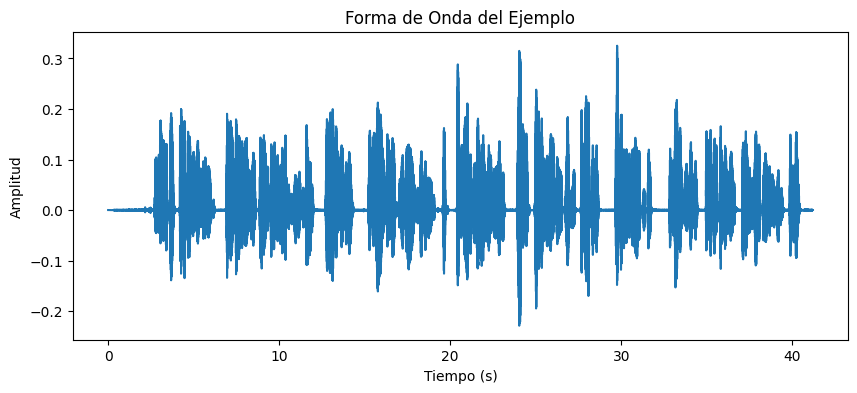

In [ ]:
audio_cnn, sr = librosa.load('/content/drive/MyDrive/AUDIOS/SEBAS/sebas1.wav', sr=16000)
graficar_forma_onda(audio_ejemplo, sr, titulo="Forma de Onda del Ejemplo")

<h1> MENCION IMPORTANTE </h1> modelo con convolucionales se usó espectrograma mel y no mfcc


Un espectrograma Mel es una representación visual de la energía de las frecuencias de una señal de audio a lo largo del tiempo, utilizando una escala de frecuencia Mel, que se asemeja a la percepción humana del sonido. Se crea dividiendo la señal de audio en ventanas, aplicando la Transformada de Fourier a cada ventana para obtener el espectro de frecuencias, mapeando las frecuencias a la escala Mel y visualizando la energía de estas frecuencias a lo largo del tiempo. Es útil en aplicaciones de procesamiento de audio y reconocimiento de voz.




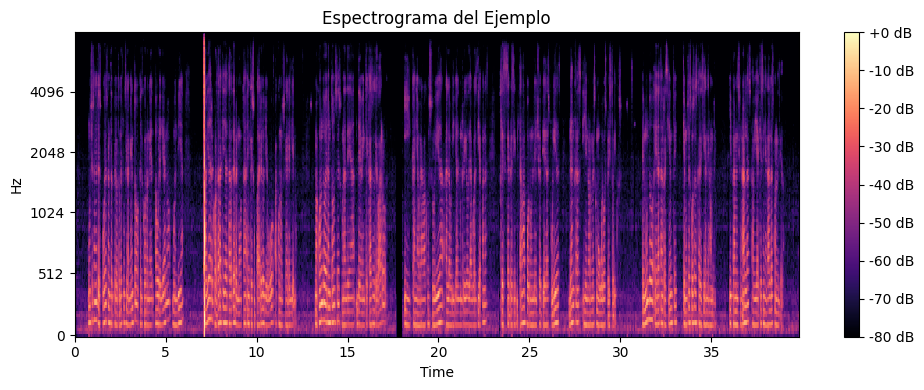

In [ ]:
def graficar_espectrograma(audio, sr, titulo="Espectrograma"):
    S = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128, fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
    plt.colorbar(format='%+2.0f dB')
    plt.title(titulo)
    plt.tight_layout()
    plt.show()

graficar_espectrograma(audio_cnn, sr, titulo="Espectrograma del Ejemplo")

In [ ]:
S = librosa.feature.melspectrogram(y=X_frag, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
x_conv = np.expand_dims(S_dB, axis=-1)

In [ ]:
dataset_normalizado = (x_conv - x_conv.min()) / (x_conv.max() - x_conv.min())

Split

In [ ]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(dataset_normalizado, y, test_size=0.2, random_state=42, stratify=y)

# Mostramos las formas de los conjuntos de datos
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de y_test: {y_test.shape}")


Forma de X_train: (400, 128, 32, 1)
Forma de X_test: (100, 128, 32, 1)
Forma de y_train: (400,)
Forma de y_test: (100,)


<h1> MODELO CNN </h1>

Este código define y entrena una red neuronal convolucional (CNN) para clasificar audio. Utiliza Keras para construir el modelo con capas de convolución, max-pooling y dropout. El modelo se compila con el optimizador Adam y se entrena con datos de audio preprocesados. Se configuran callbacks para guardar el mejor modelo, detener el entrenamiento temprano y ajustar la tasa de aprendizaje. Finalmente, el modelo se evalúa en el conjunto de prueba y se imprime la precisión obtenida.

<b> IMPORTANTE:</b> modelo con convolucionales se usó espectrograma mel y no mfcc

In [ ]:
from keras.utils import plot_model
from keras.optimizers import Adam

# Definición del modelo
tf.keras.utils.set_random_seed(42)
modelo = Sequential()
modelo.add(Input(shape=(x_conv.shape[1], x_conv.shape[2], 1)))
modelo.add(Conv2D(16, 3, activation="relu", padding="same"))
modelo.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
modelo.add(Dropout(0.5))
modelo.add(Conv2D(16, 3, activation="relu", padding="same"))
modelo.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
modelo.add(Dropout(0.5))
modelo.add(Flatten())
modelo.add(Dense(len(set(y)), activation='softmax'))
modelo.summary()

# Visualizamos el modelo
plot_model(modelo, to_file='model_plot.png', show_shapes=True, show_layer_names=True, rankdir='LR')

# Compilamos el modelo
modelo.compile(optimizer=Adam(learning_rate=0.005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

callbacks = [call.ModelCheckpoint(filepath='model.best.keras', verbose = 1, save_best_only=True),\
             call.EarlyStopping(patience=5, restore_best_weights=True,min_delta=1e-3, monitor="val_loss"),\
             call.ReduceLROnPlateau(monitor='val_loss', patience = 3, verbose = 1, factor = 0.8, min_lr = 1e-5)]

historia = modelo.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test),callbacks=callbacks,shuffle=True)

# Evaluamos el modelo
loss, accuracy = modelo.evaluate(X_test, y_test)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 128, 32, 16)         │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 64, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 64, 16, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 32, 8, 16)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 32, 8, 16)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │          20,485 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,965 (89.71 KB)

 Trainable params: 22,965 (89.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.2348 - loss: 1.5661
Epoch 1: val_loss improved from inf to 1.39972, saving model to model.best.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 308ms/step - accuracy: 0.2379 - loss: 1.5609 - val_accuracy: 0.4700 - val_loss: 1.3997 - learning_rate: 0.0050
Epoch 2/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - accuracy: 0.3438 - loss: 1.3652
Epoch 2: val_loss improved from 1.39972 to 1.03705, saving model to model.best.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4973 - loss: 1.2093 - val_accuracy: 0.6400 - val_loss: 1.0371 - learning_rate: 0.0050
Epoch 3/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6562 - loss: 0.8856
Epoch 3: val_loss improved from 1.03705 to 0.72573, saving model to model.best.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6883 - loss: 0.8355 - val_accuracy: 0.7600 - val_loss: 0.7257 - learning_rate: 0.0050
Epoch 4/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8438 - lo

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


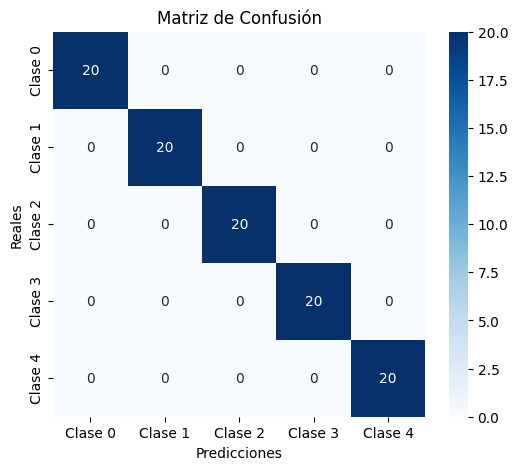

In [ ]:
# Realizamos predicciones en el conjunto de prueba
predicciones = modelo.predict(X_test)
clases_predichas = np.argmax(predicciones, axis=1)

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, clases_predichas)

# Visualizamos la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3", "Clase 4"], yticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3", "Clase 4"])
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.title("Matriz de Confusión")
plt.show()


<h1> Metodo por redes recurrentes </h1>

In [ ]:
def extraer_caracteristicas(dataset, sr=16000, n_mfcc=13):
    """
    Extrae MFCCs de una lista de rutas de archivos de audio.
    """
    X = []
    mfccs = librosa.feature.mfcc(y=dataset, sr=sr, n_mfcc=n_mfcc)
    X.append(mfccs.T)  # Transponemos para que sea (time_steps, n_mfcc)
    return np.moveaxis(np.squeeze(np.array(X)), -1, 0)

X_mfcc_rnn = extraer_caracteristicas(X_frag, sr=16000, n_mfcc=13)

In [ ]:
X_mfcc_rnn.shape

(500, 32, 13)

In [ ]:
y.shape

(500,)

In [ ]:
# Índices para los datos de entrenamiento
val_indices = np.r_[0:80, 100:180, 200:280, 300:380, 400:480]

# Creaamos conjunto de entrenamiento
X_train_rnn = X_mfcc_rnn[val_indices]
y_train_rnn = y[val_indices]

# Creamos conjunto de validación eliminando los índices seleccionados
mask = np.ones(X_mfcc_rnn.shape[0], dtype=bool)  # Máscara booleana para seleccionar
mask[val_indices] = False

X_test_rnn = X_mfcc_rnn[mask]
y_test_rnn = y[mask]

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, None, 128)           │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,717 (202.02 KB)

 Trainable params: 51,717 (202.02 KB)

 Non-trainable params: 0 (0.00 B)

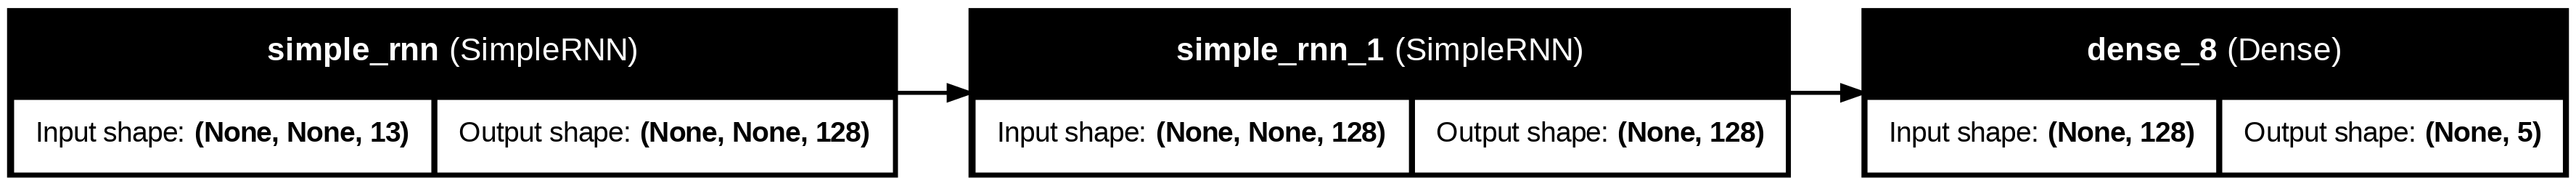

In [ ]:
#Definimos del modelo
keras.utils.set_random_seed(42)
modelo_RNN = Sequential()
modelo_RNN.add(Input(shape=([None,13])))
modelo_RNN.add(SimpleRNN(128, return_sequences=True))
modelo_RNN.add(SimpleRNN(128))
modelo_RNN.add(Dense(5, activation = 'softmax'))
modelo_RNN.summary()

keras.utils.plot_model(modelo_RNN, to_file='model_plot.png', show_shapes=True, show_layer_names=True,rankdir='LR')

In [ ]:
callbacks = [call.ModelCheckpoint(filepath='modelRNN.best.keras', verbose = 1, save_best_only=True),\
             call.EarlyStopping(patience=5, restore_best_weights=True,min_delta=1e-3, monitor="val_loss"),\
             call.ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose = 1, factor = 0.8, min_lr = 1e-5)]

modelo_RNN.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
historia = modelo_RNN.fit(X_train_rnn,y_train_rnn,
                          validation_data = (X_test_rnn,y_test_rnn),
                          verbose=1, epochs=1000,
                          callbacks=callbacks,shuffle=True)

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.2859 - loss: 1.6976
Epoch 1: val_loss improved from inf to 1.13249, saving model to modelRNN.best.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step - accuracy: 0.2935 - loss: 1.6797 - val_accuracy: 0.5200 - val_loss: 1.1325 - learning_rate: 0.0010
Epoch 2/1000
11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5938 - loss: 1.0293
Epoch 2: val_loss improved from 1.13249 to 0.83645, saving model to modelRNN.best.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6019 - loss: 1.0116 - val_accuracy: 0.6600 - val_loss: 0.8364 - learning_rate: 0.0010
Epoch 3/1000
11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7625 - loss: 0.7073
Epoch 3: val_loss improved from 0.83645 to 0.51802, saving model to modelRNN.best.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7690 - loss: 0.6878 - val_accuracy: 0.7900 - val_loss: 0.5180 - learning_rate: 0.0010
Epoch 4/1000
11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - ac

In [ ]:
predicciones_rnn = modelo_RNN.predict(X_test_rnn)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step


In [ ]:
clases_predichas_rnn = np.argmax(predicciones_rnn, axis = 1)
print(clases_predichas_rnn)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [ ]:
accuracy_rnn = accuracy_score(y_test_rnn, clases_predichas_rnn)
print(accuracy_rnn)

1.0


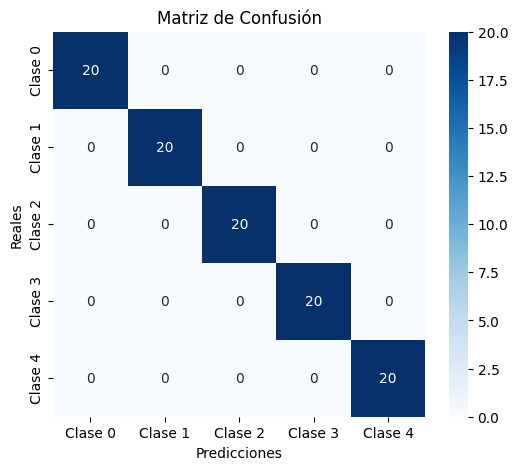

In [ ]:
# Calculamos la matriz de confusión
cm = confusion_matrix(y_test_rnn, clases_predichas_rnn)

# Visualizamos la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3", "Clase 4"], yticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3", "Clase 4"])
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.title("Matriz de Confusión")
plt.show()

<h1> 3. REFERENCIAS UTILIZADAS </h1>

- Edge Impulse Documentation - Guía completa sobre cómo utilizar Edge Impulse para proyectos de aprendizaje automático en dispositivos edge: https://docs.edgeimpulse.com/docs

- TensorFlow Audio Recognition - Tutorial de TensorFlow sobre cómo reconocer audio utilizando redes neuronales: https://www.tensorflow.org/tutorials/audio/simple_audio?hl=es-419

- Librosa Documentation - Documentación de Librosa, una biblioteca de Python para análisis de audio: https://librosa.org/doc/latest/index.html

- Keras Audio Preprocessing - Información sobre las herramientas de preprocesamiento de audio disponibles en Keras: https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

<h1> 4. Descripciones </h1>

En este apartado se pondran algunos diagramas de bloques utilizados, el hardware usado y la recopilaciòn de los datos.

- <h3> 4.1 Diagrama de bloques. </h3>

<h3> - Diagrama de MFCC </h3>

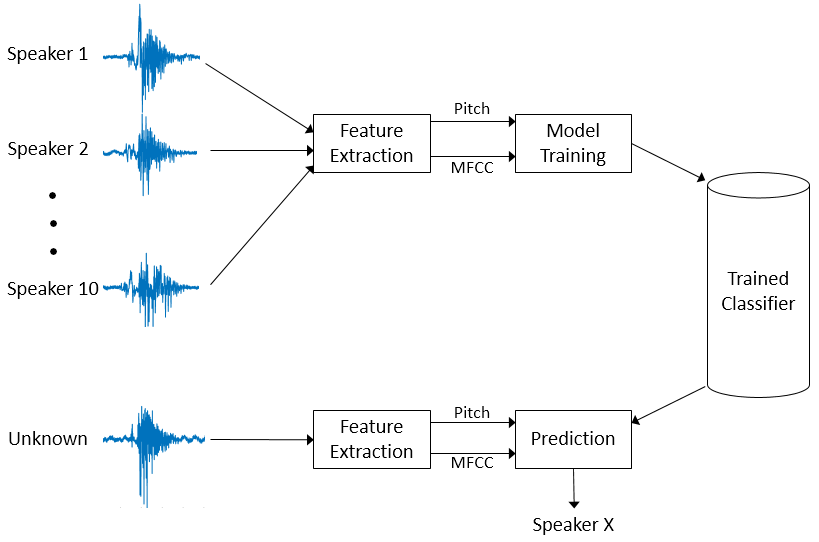


- <h3> Arquitectura basica de modelo de redes neuronales </h3>

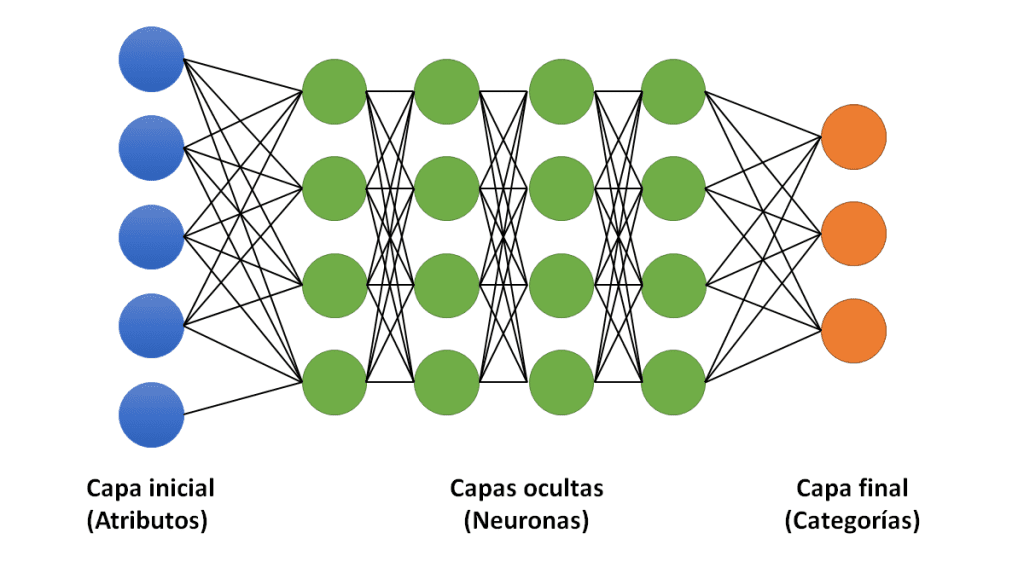

- <h3> Arquitectura basica modelo MLP </h3>

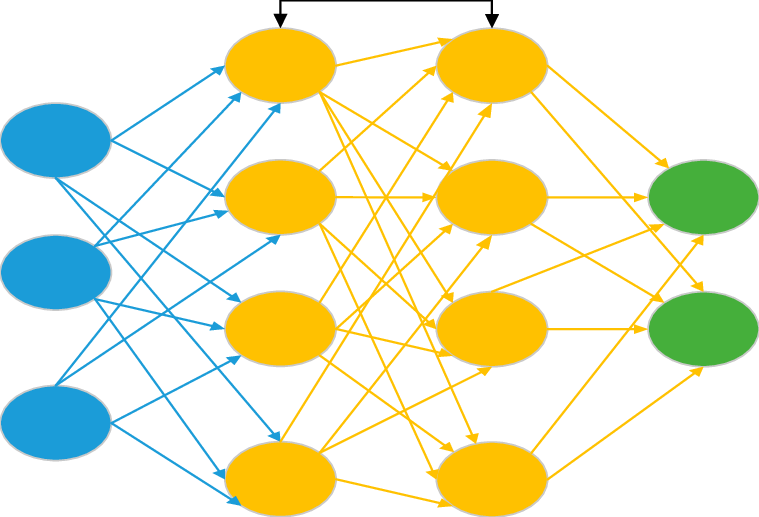


<h4> 4.2 HARDWARE UTILIZADO </h4>

- Para la realizaciòn de este proyecto, fue necesario utilziar microfonos, un ordenador y el bakcend de Python de google Colab, en la siguiente lista se pueden apreciar los diferentes elementos de hardware utilizados.

- <h3> Dispositivo Movil </h3>

Se utilizo los dispositivos moviles de los integrantes del grupo de trabajo para enviar los audios mediante whatsapp para realizar el entrenamiento del modelo.

- <h3> Ordenador Portatil </h3>

Se utilizo un computador portatil de los intengrantes de grupo con las siguientes caracteristicas.

- RTX GFORCE 4050 6GB
- INTEL I5 12000H
- 16 GB RAM

- <h3> Backend Google Colab Python </h3>

- 24 GRAM
- 16 VRAM DEDICADA
- 80 GB DISCO ALMACENAMIENTO


<h2> 5. Dificultades encontradas <h2>

A lo largo de la realizaciòn de este proyecto, nos encontramos con las siguientes dificultdes para llegar a los resultados esperados.


1. **Recolección de Datos de Calidad**: Obtener muestras de audio de alta calidad y en cantidad suficiente para entrenar el modelo puede ser un desafío.
2. **Preprocesamiento de Audio**: Eliminar ruido y normalizar las señales de audio para asegurar que sean adecuadas para el entrenamiento del modelo.
3. **Diseño del Modelo**: Seleccionar la arquitectura de red neuronal adecuada y ajustar los hiperparámetros para obtener un modelo preciso y eficiente.
4. **Entrenamiento del Modelo**: Requiere una cantidad significativa de recursos computacionales y tiempo, especialmente si se trabaja con grandes volúmenes de datos.
5. **Validación y Evaluación**: Asegurar que el modelo generalice bien y no esté sobreajustado a los datos de entrenamiento, lo cual puede ser complicado.
6. **Implementación en Dispositivos Edge**: Optimizar el modelo para que funcione eficientemente en dispositivos con recursos limitados, como smartphones.
7. **Detección de Silencio**: Implementar una clase de silencio que el algoritmo pueda detectar correctamente cuando no hay ninguna voz presente.






<h1> 6. Conclusiones del modelo generado en Colab<h1/>

<h3>- Obtuvimos en todas las predicciones que son correctas, ya que los valores están en la diagonal principal, lo que indica que no hubo errores de clasificación para ninguna clase.<h3/>

<h3>- Se tiene un equilibrio en las clases ya que tienen exactamente 20 ejemplos correctamente clasificados, lo que sugiere que el conjunto de datos está equilibrado y el modelo no tiene sesgo hacia ninguna clase.<h3/>

<h3>- Se concluye que no hay ausencia de confusiones no hay valores fuera de la diagonal principal, lo que implica que el modelo distingue perfectamente entre todas las clases sin confusiones.<h3/>



<h3><b> 7 EVIDENCIAS DE EDGE IMPULSE </h3></b>

Para finalizar, en este item, se proporcionan las evidencias tomadas en el entrenamiento con el modelo de Edge Impulse, en las siguientes imagenes se puede apreciar lo siguiente.

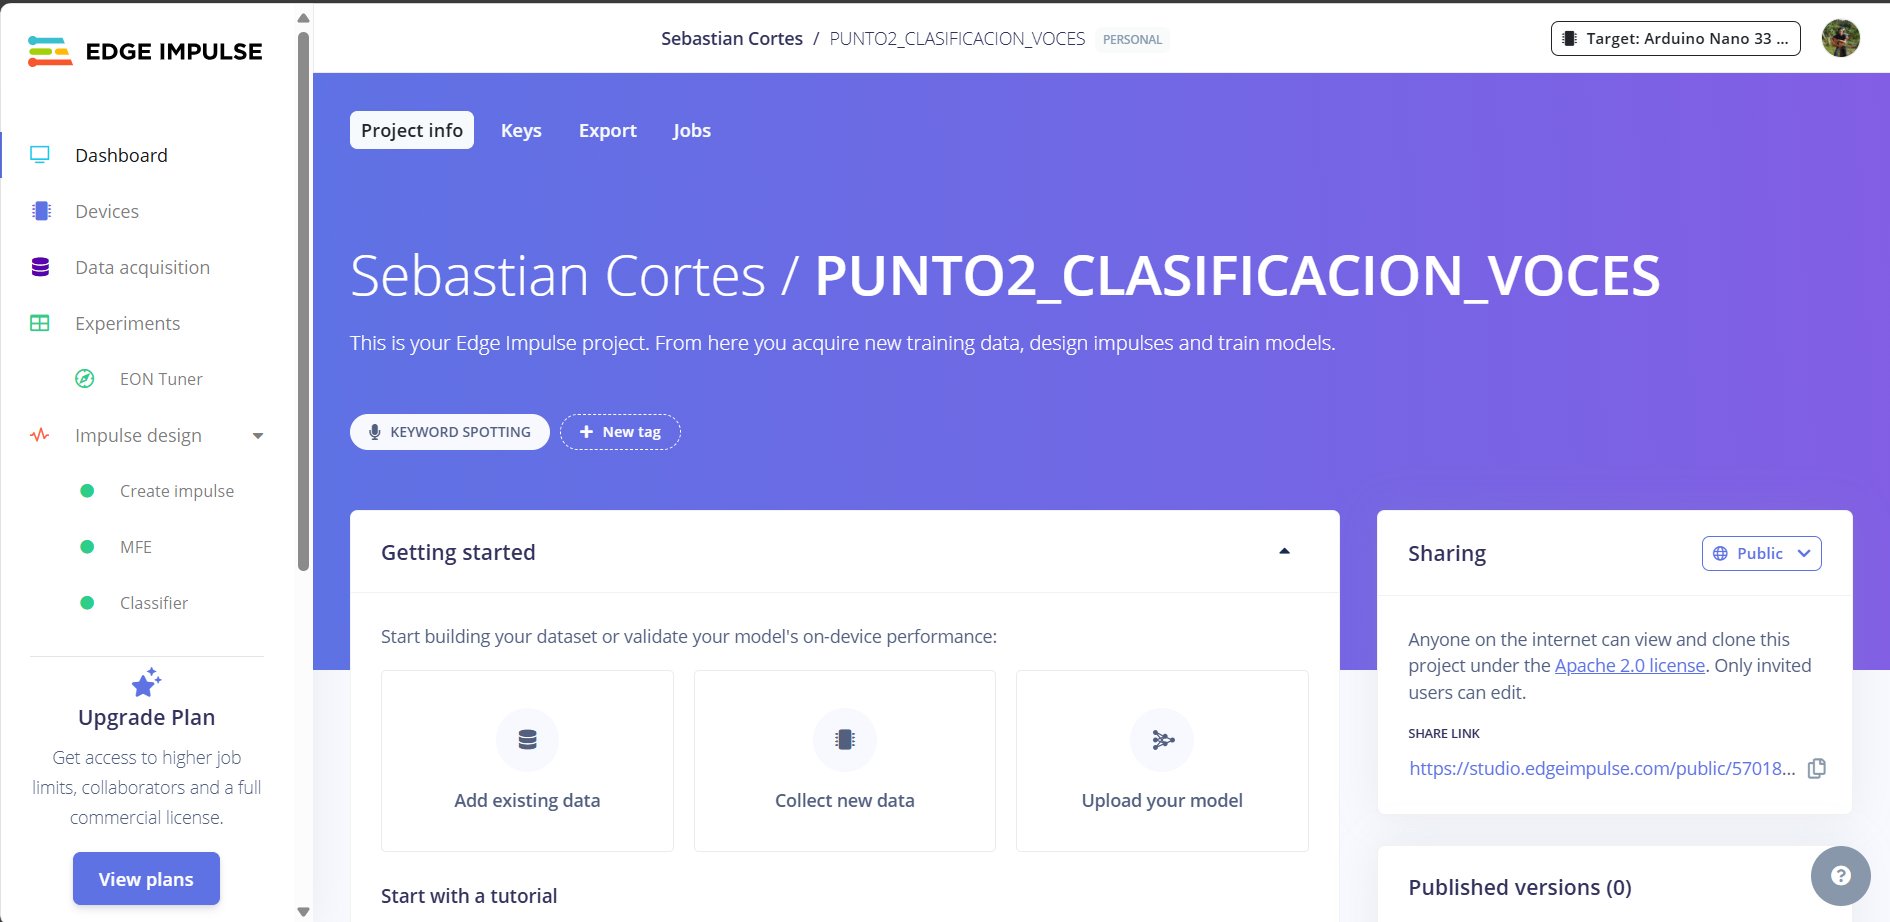

En la parte de la adquisiciòn de los datos, se tomaron los mismos datos que se sacaron en el google colab de la siguiente manera, en la siguiente imagen se puede apreciar.


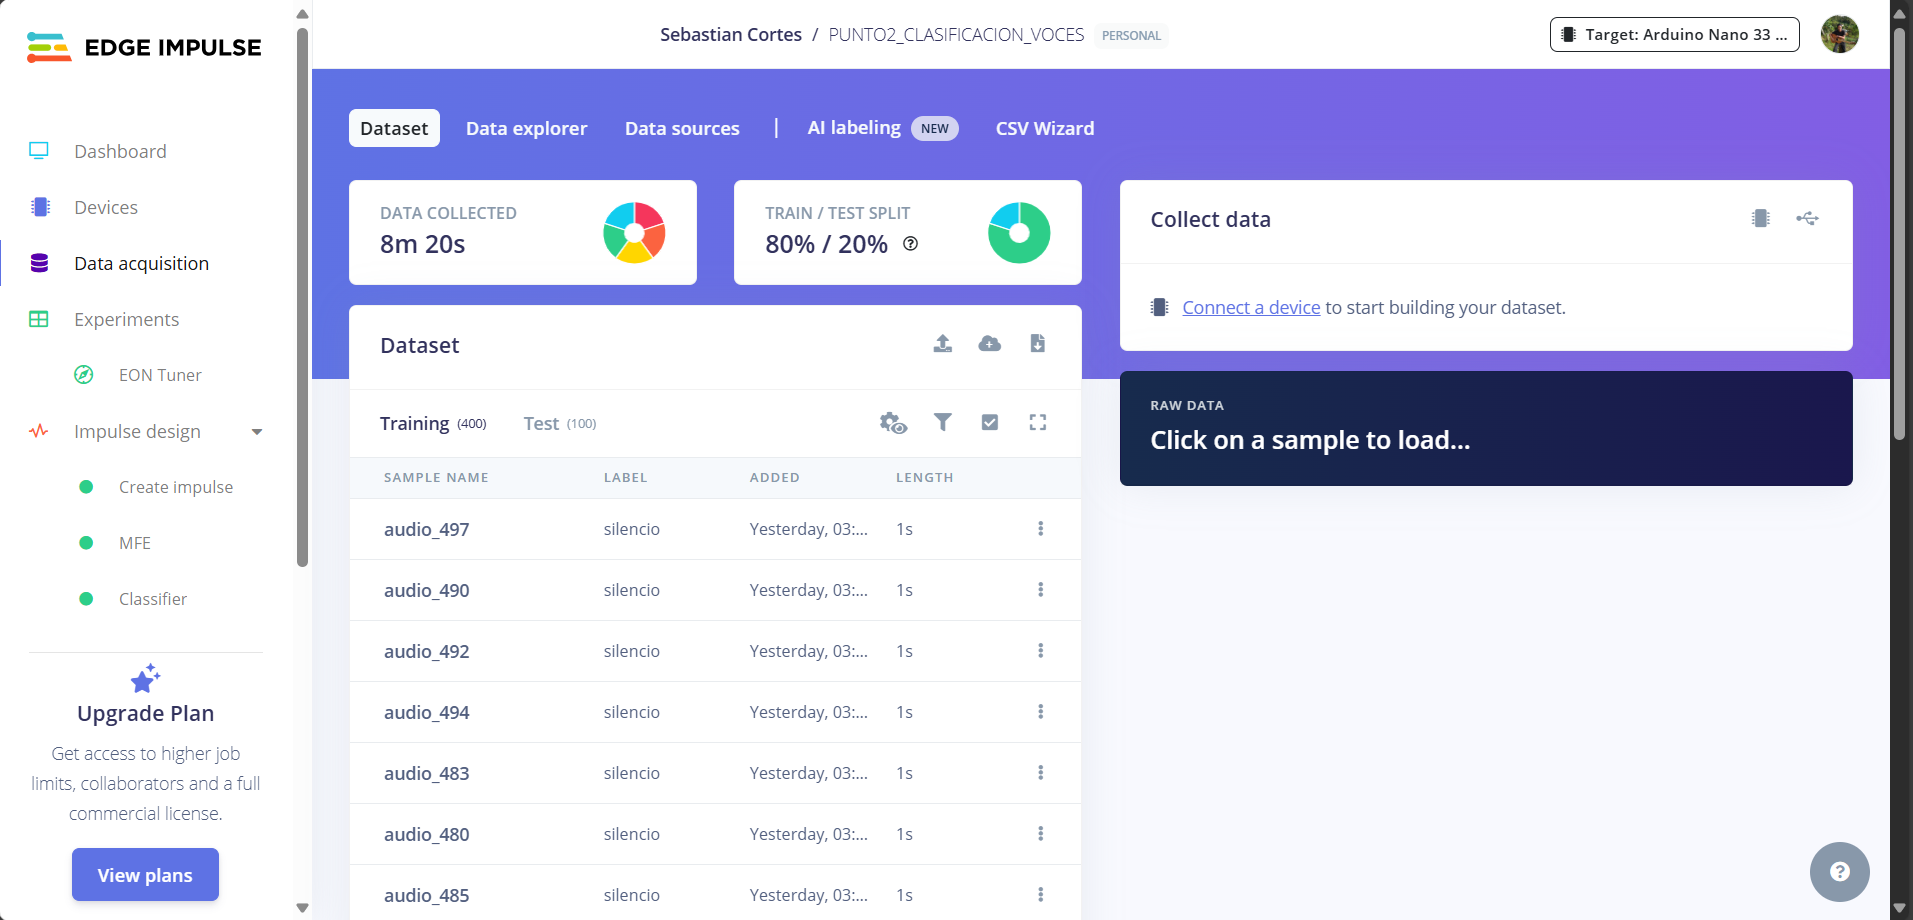

Se crear el modelo (Edge impulse de la siguiente manera)

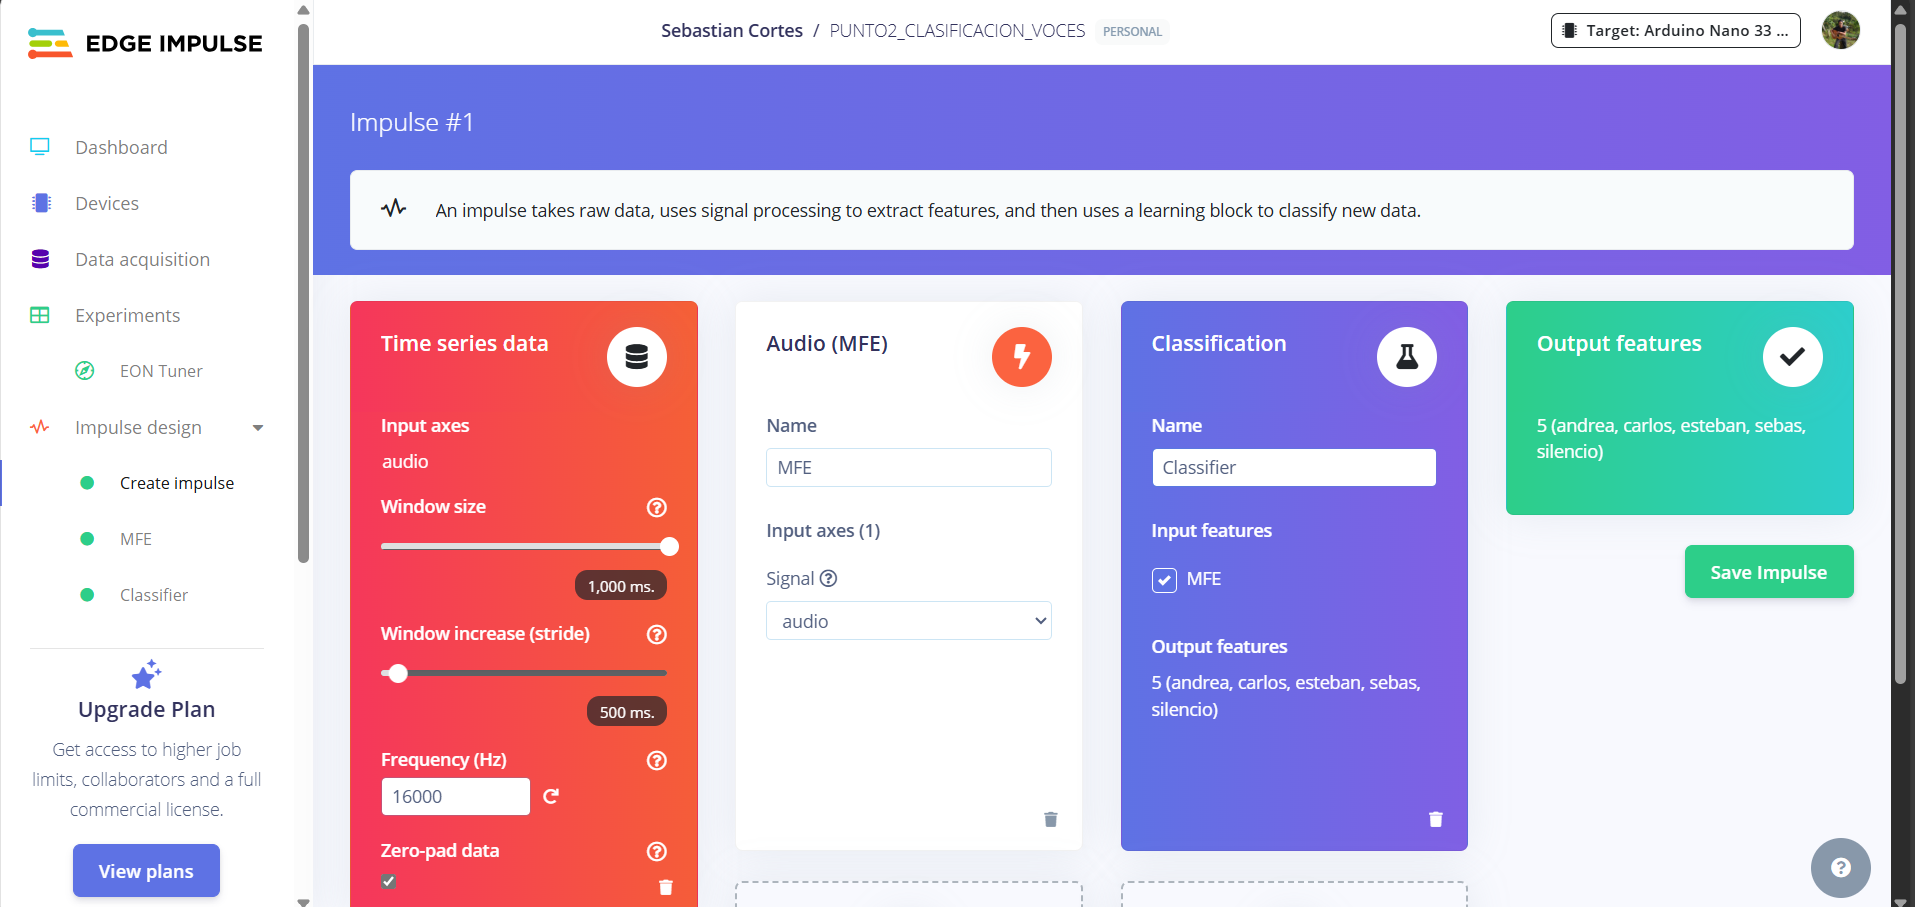

El MFE se hace con los siguientes parametros

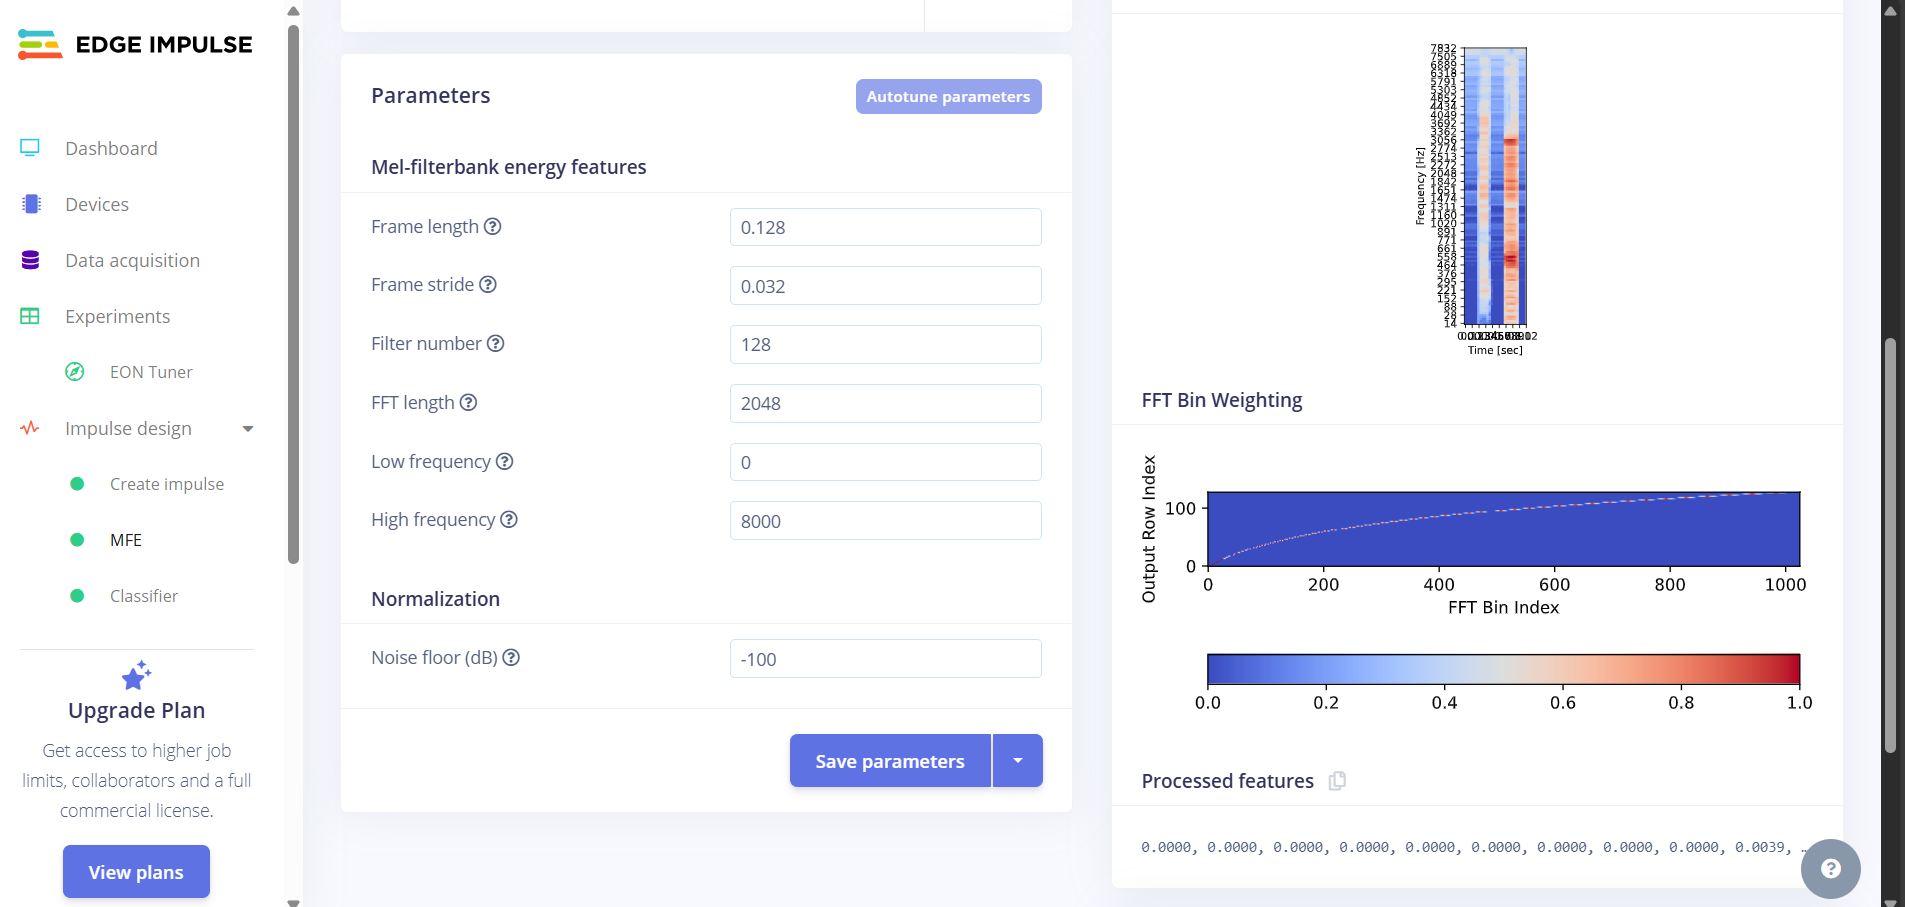


Finalmente realizamos la clasificaciòn en nuestro modelo obteniendo los siguientes resultados.


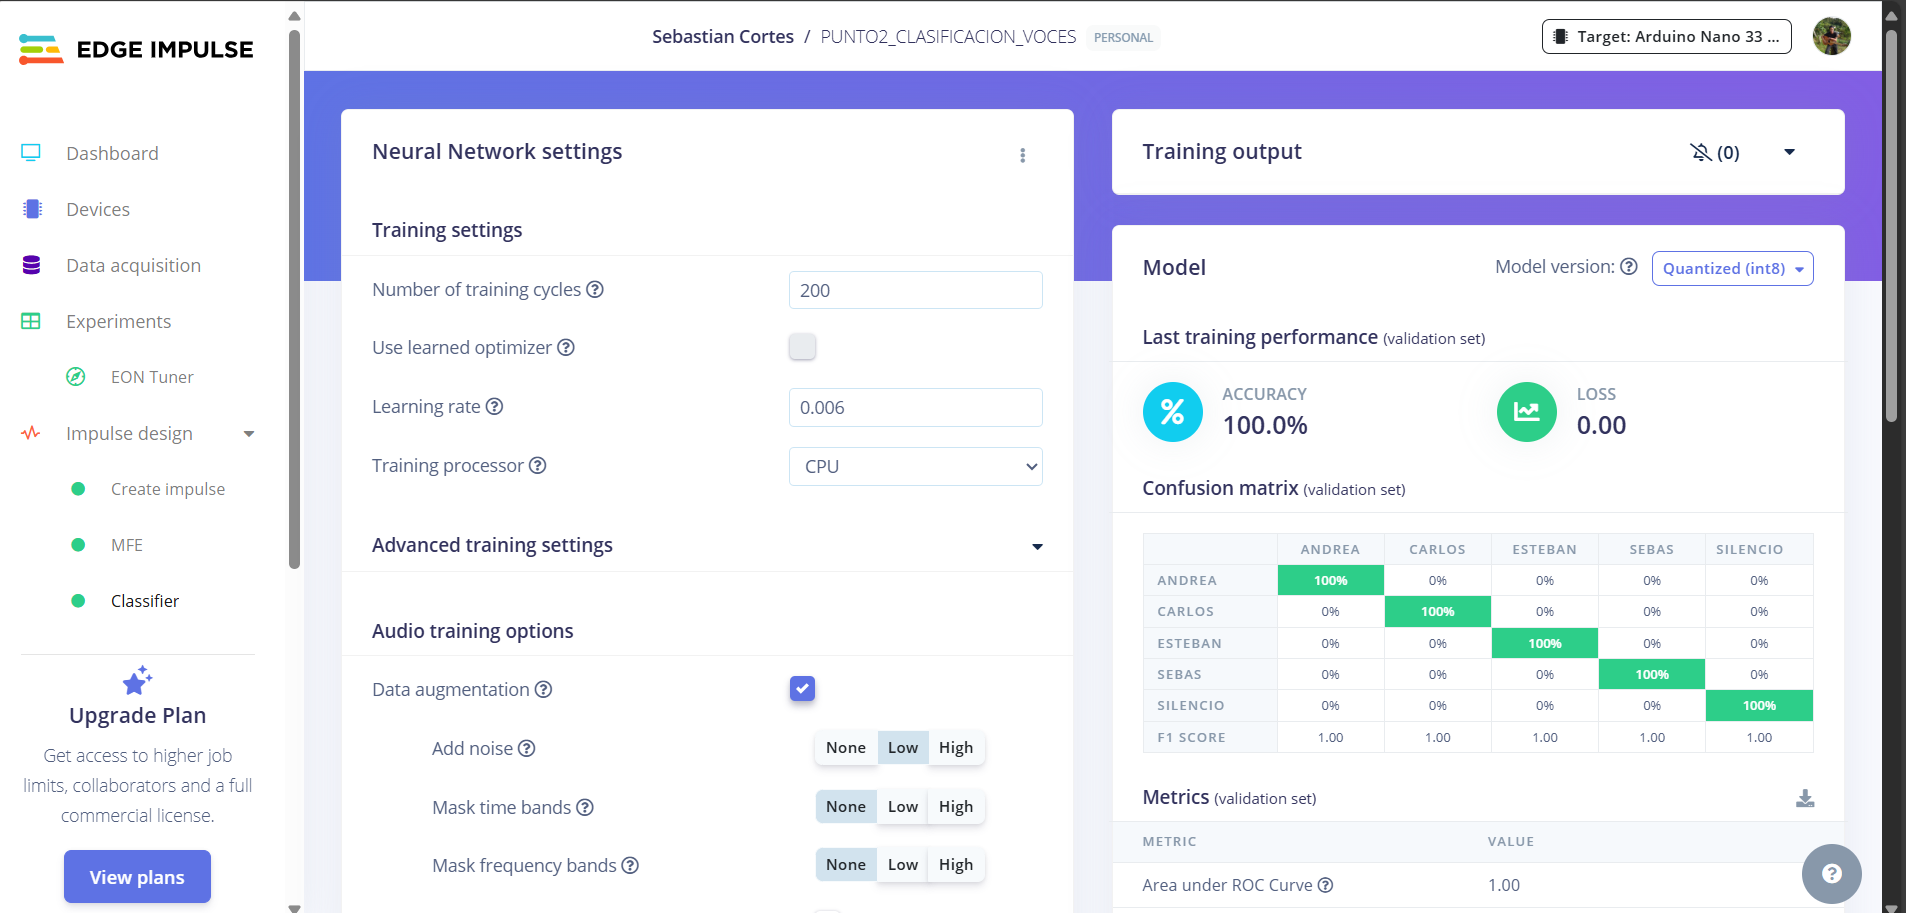


Finalmente se entrena el modelo, se obtienen muy buenos resultados, port lo que se espera que la implementaciòn sea un completo exito.

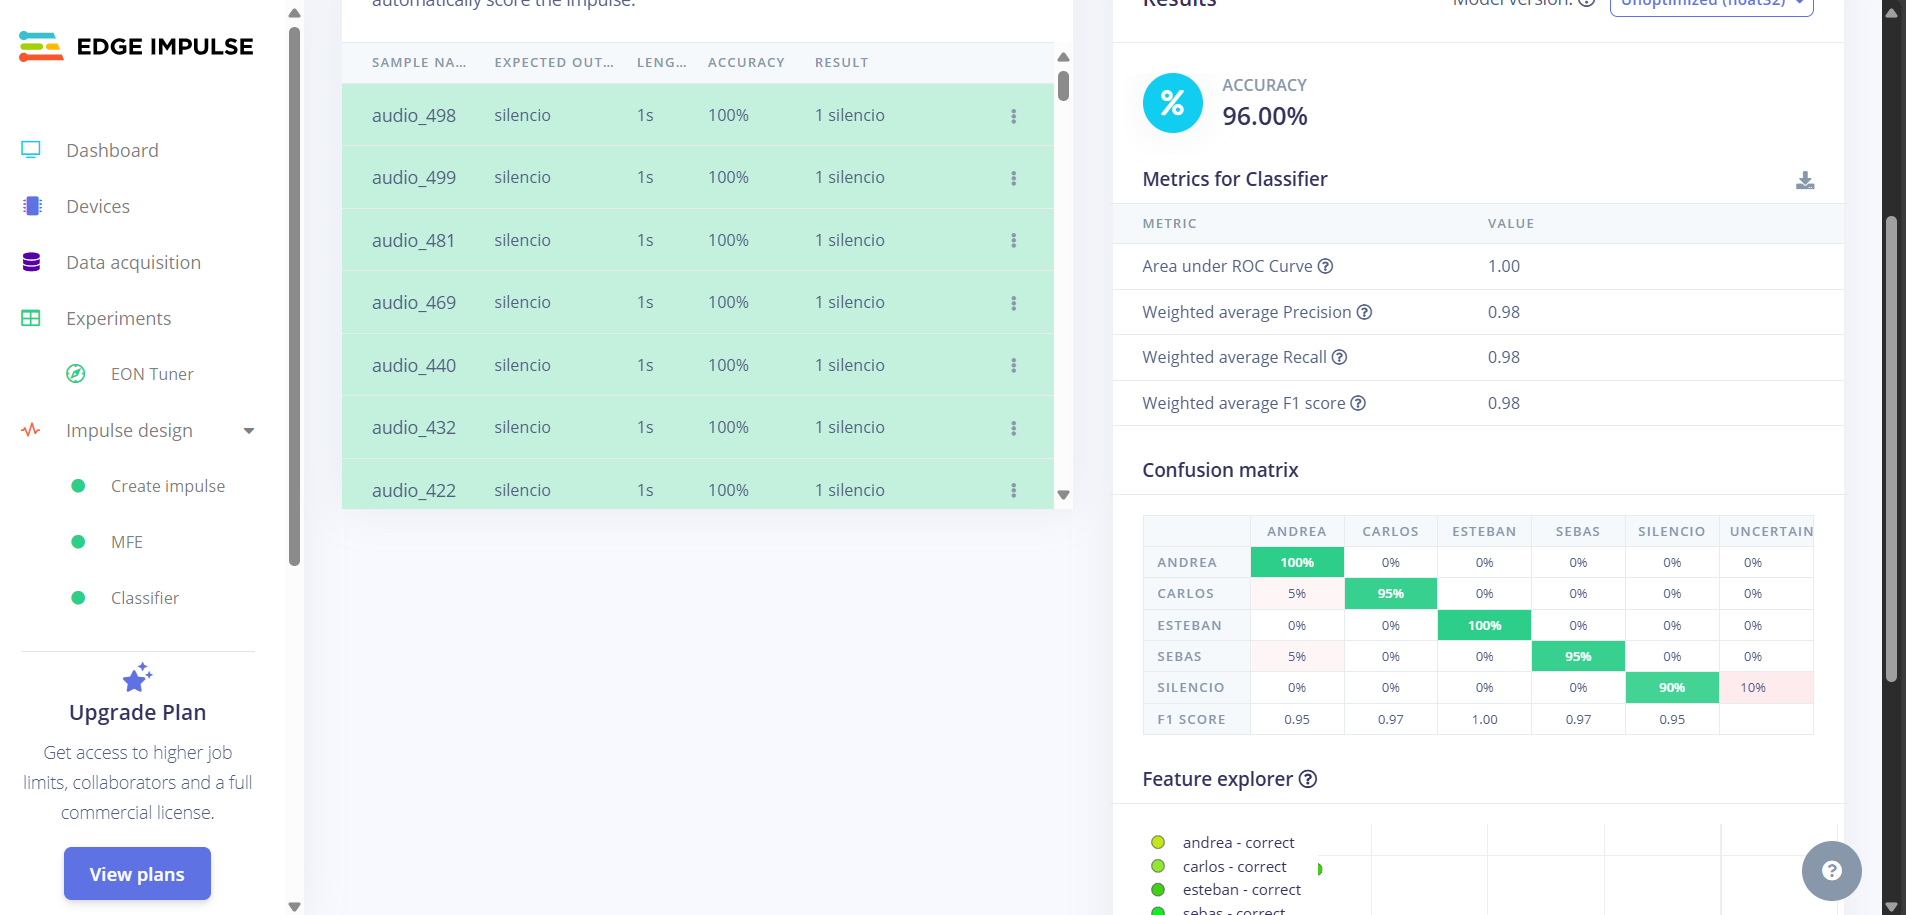


Finalmente esteban habla por el microfono y el modelo se comporta muy bien:



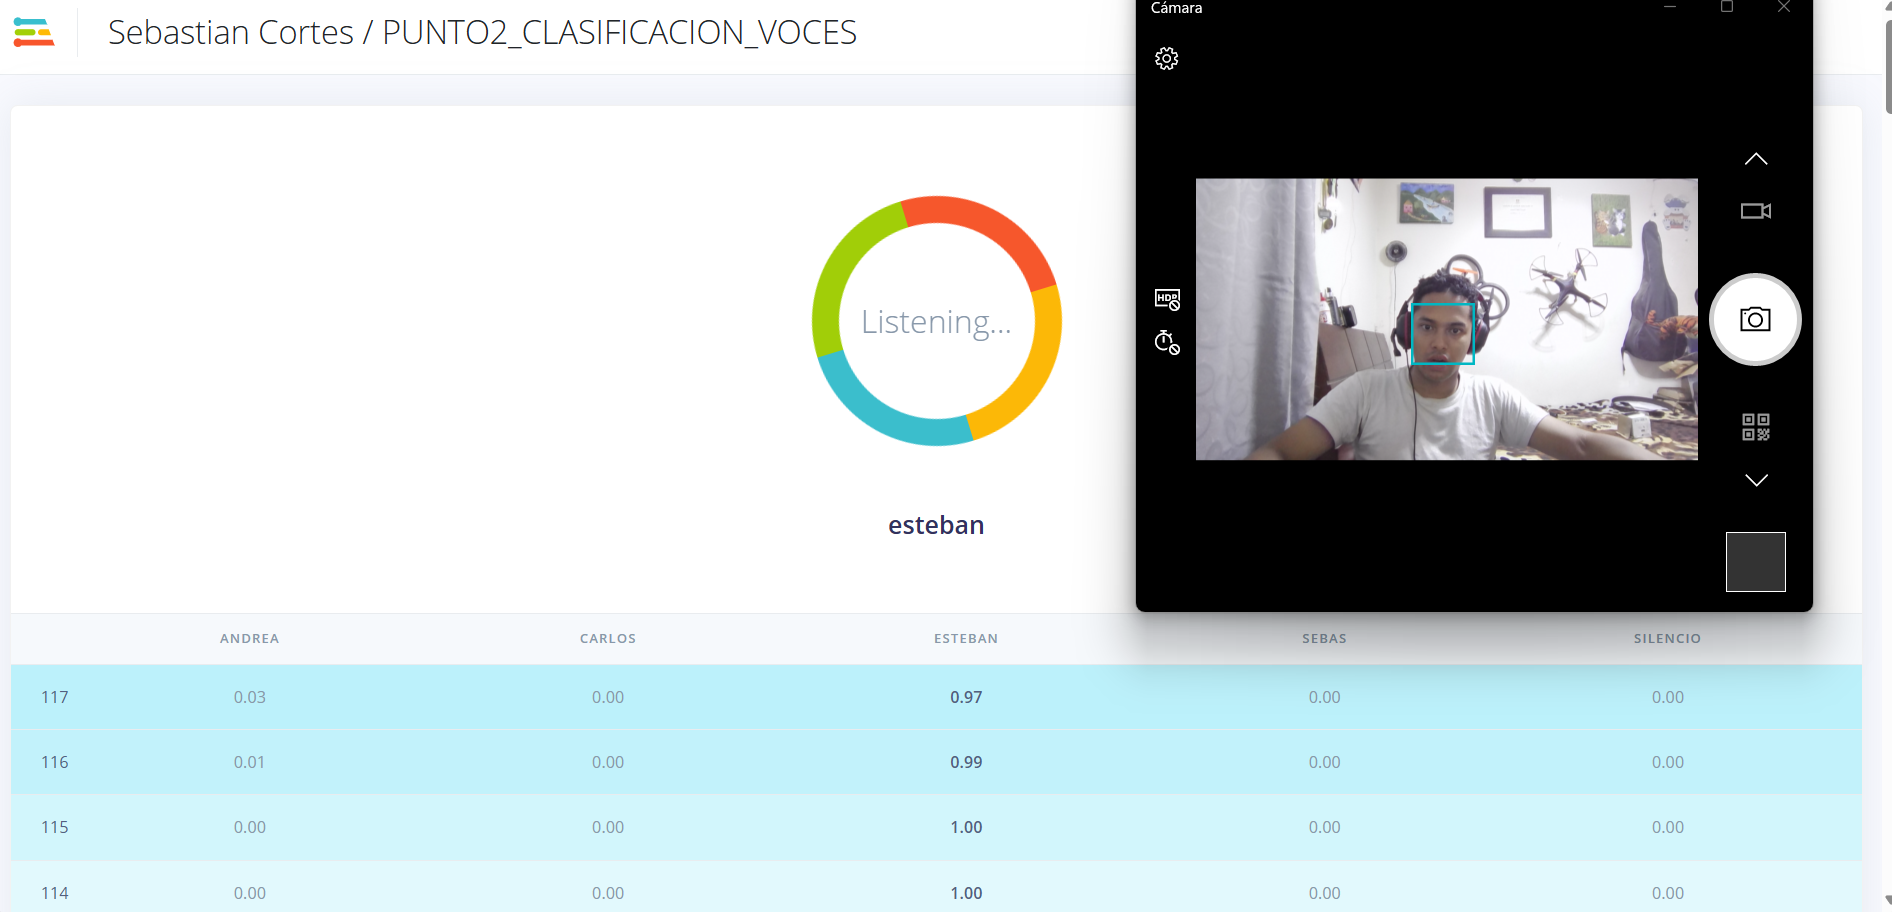


Estamos muy contentos con los resultados obtenidos. Aunque el modelo generado por Edge Impulse superó significativamente al que creamos en Google Colab, esto nos enseñó que podemos desarrollar modelos personalizados sin depender de plataformas específicas. Es cuestión de probar varios enfoques para encontrar el más efectivo. Nos sentimos orgullosos de los logros alcanzados en este proyecto.